In [3]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.shape

(404290, 6)

In [7]:
new_df = df.sample(30000)
new_df.shape

(30000, 6)

In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
new_df.duplicated().sum()

0

In [10]:
que_df = new_df[['question1','question2']]
que_df.head()

,question1,question2
398401,"Is it true that the new INR 2,000 notes will b...",Will the new Rs 2000 notes carry a nano GPS ch...
29711,Does a soy milk meal replacement help in weigh...,Can eating only one meal a day make you lose w...
185067,Do long distance relationships work?,Does long distance relationships actually work?
379092,What are the most important current women's ri...,What are the most important current women's ri...
298528,Which country will win Africa’s biennial Cup o...,Can South Africa win the T20 World Cup 2016?


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(que_df['question1']) + list(que_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr ,q2_arr= np.vsplit(cv.fit_transform(questions).toarray() ,2)

In [12]:
temp_df1 = pd.DataFrame(q1_arr ,index=que_df.index)
temp_df2 = pd.DataFrame(q2_arr ,index=que_df.index)
temp_df = pd.concat([temp_df1 ,temp_df2] ,axis=1)
temp_df.shape

(30000, 6000)

In [13]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [14]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
398401,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
379092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
temp_df.shape

(30000, 6001)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values ,temp_df.iloc[:,-1].values ,test_size=0.2 ,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train ,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test ,y_pred)

0.7396666666666667

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train ,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test ,y_pred)

0.7221666666666666

FEATURE ENGINEERING

In [19]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398401,398401,56665,5856,"Is it true that the new INR 2,000 notes will b...",Will the new Rs 2000 notes carry a nano GPS ch...,1,78,70
29711,29711,54943,54944,Does a soy milk meal replacement help in weigh...,Can eating only one meal a day make you lose w...,0,53,52
185067,185067,1932,30545,Do long distance relationships work?,Does long distance relationships actually work?,1,36,47
379092,379092,116014,203733,What are the most important current women's ri...,What are the most important current women's ri...,0,66,67
298528,298528,421036,421037,Which country will win Africa’s biennial Cup o...,Can South Africa win the T20 World Cup 2016?,0,82,44


In [26]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x : len(x.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x : len(x.split(" ")))

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398401,398401,56665,5856,"Is it true that the new INR 2,000 notes will b...",Will the new Rs 2000 notes carry a nano GPS ch...,1,78,70,17,15
29711,29711,54943,54944,Does a soy milk meal replacement help in weigh...,Can eating only one meal a day make you lose w...,0,53,52,10,11
185067,185067,1932,30545,Do long distance relationships work?,Does long distance relationships actually work?,1,36,47,5,6
379092,379092,116014,203733,What are the most important current women's ri...,What are the most important current women's ri...,0,66,67,11,11
298528,298528,421036,421037,Which country will win Africa’s biennial Cup o...,Can South Africa win the T20 World Cup 2016?,0,82,44,13,9


In [28]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip() ,row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip() ,row['question2'].split(" ")))
  return len(w1 & w2)

In [30]:
new_df['common_words'] = new_df.apply(common_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
398401,398401,56665,5856,"Is it true that the new INR 2,000 notes will b...",Will the new Rs 2000 notes carry a nano GPS ch...,1,78,70,17,15,9
29711,29711,54943,54944,Does a soy milk meal replacement help in weigh...,Can eating only one meal a day make you lose w...,0,53,52,10,11,2
185067,185067,1932,30545,Do long distance relationships work?,Does long distance relationships actually work?,1,36,47,5,6,4
379092,379092,116014,203733,What are the most important current women's ri...,What are the most important current women's ri...,0,66,67,11,11,10
298528,298528,421036,421037,Which country will win Africa’s biennial Cup o...,Can South Africa win the T20 World Cup 2016?,0,82,44,13,9,2


In [31]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip() ,row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip() ,row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [32]:
new_df['word_total'] = new_df.apply(total_words ,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
398401,398401,56665,5856,"Is it true that the new INR 2,000 notes will b...",Will the new Rs 2000 notes carry a nano GPS ch...,1,78,70,17,15,9,31
29711,29711,54943,54944,Does a soy milk meal replacement help in weigh...,Can eating only one meal a day make you lose w...,0,53,52,10,11,2,21
185067,185067,1932,30545,Do long distance relationships work?,Does long distance relationships actually work?,1,36,47,5,6,4,11
379092,379092,116014,203733,What are the most important current women's ri...,What are the most important current women's ri...,0,66,67,11,11,10,22
298528,298528,421036,421037,Which country will win Africa’s biennial Cup o...,Can South Africa win the T20 World Cup 2016?,0,82,44,13,9,2,22


In [34]:
new_df['word_share'] = round(new_df['common_words'] /new_df['word_total'] ,2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
398401,398401,56665,5856,"Is it true that the new INR 2,000 notes will b...",Will the new Rs 2000 notes carry a nano GPS ch...,1,78,70,17,15,9,31,0.29
29711,29711,54943,54944,Does a soy milk meal replacement help in weigh...,Can eating only one meal a day make you lose w...,0,53,52,10,11,2,21,0.10
185067,185067,1932,30545,Do long distance relationships work?,Does long distance relationships actually work?,1,36,47,5,6,4,11,0.36
379092,379092,116014,203733,What are the most important current women's ri...,What are the most important current women's ri...,0,66,67,11,11,10,22,0.45
298528,298528,421036,421037,Which country will win Africa’s biennial Cup o...,Can South Africa win the T20 World Cup 2016?,0,82,44,13,9,2,22,0.09


minimum characters 4
maximum characters 300
average num of characters 59


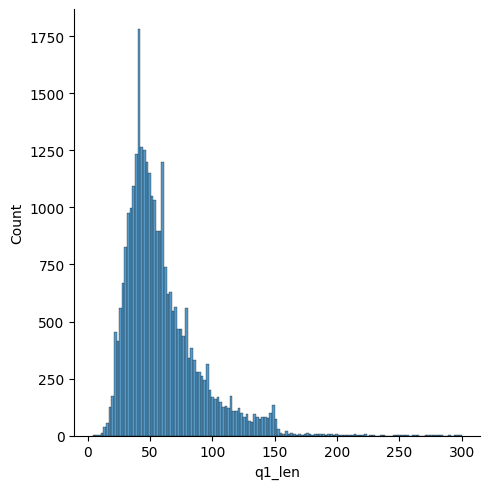

In [35]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 4
maximum characters 1151
average num of characters 59


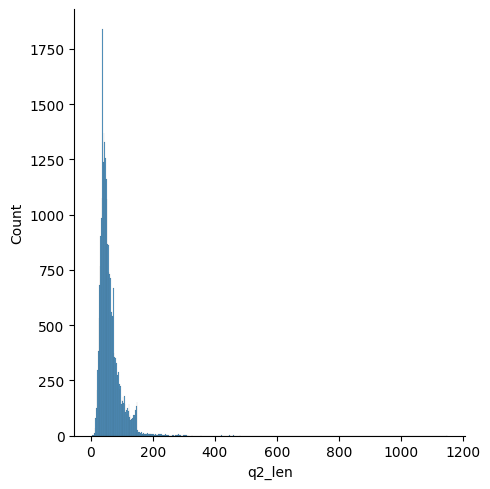

In [36]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum characters 1
maximum characters 65
average num of characters 10


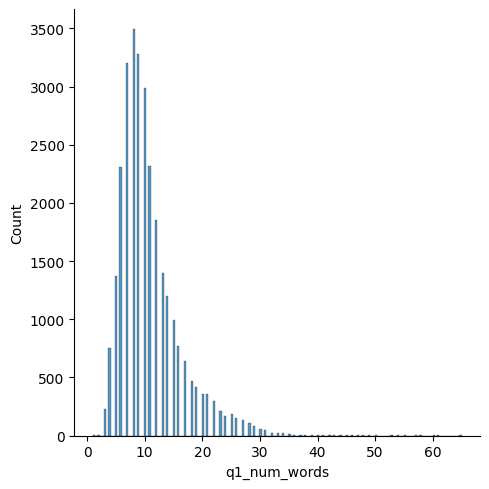

In [37]:
sns.displot(new_df['q1_num_words'])
print('minimum characters',new_df['q1_num_words'].min())
print('maximum characters',new_df['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

In [38]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.shape

(30000, 8)

In [39]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
398401,1,78,70,17,15,9,31,0.29
29711,0,53,52,10,11,2,21,0.10
185067,1,36,47,5,6,4,11,0.36
379092,0,66,67,11,11,10,22,0.45
298528,0,82,44,13,9,2,22,0.09


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(que_df['question1']) + list(que_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr ,q2_arr= np.vsplit(cv.fit_transform(questions).toarray() ,2)

In [41]:
temp_df1 = pd.DataFrame(q1_arr ,index=que_df.index)
temp_df2 = pd.DataFrame(q2_arr ,index=que_df.index)
temp_df = pd.concat([temp_df1 ,temp_df2] ,axis=1)
temp_df.shape

(30000, 6000)

In [42]:
final_df = pd.concat([final_df,temp_df] ,axis=1)
final_df.shape

(30000, 6008)

In [43]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398401,1,78,70,17,15,9,31,0.29,1,0,...,0,0,0,0,0,0,0,0,0,0
29711,0,53,52,10,11,2,21,0.10,0,0,...,1,0,0,0,0,0,0,0,0,0
185067,1,36,47,5,6,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
379092,0,66,67,11,11,10,22,0.45,0,0,...,0,0,0,0,0,0,0,0,0,0
298528,0,82,44,13,9,2,22,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,1:].values ,temp_df.iloc[:,0].values ,test_size=0.2 ,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train ,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test ,y_pred)

0.9978333333333333

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train ,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test ,y_pred)

0.9978333333333333